In [51]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [52]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [53]:
X_train.shape

(50000, 32, 32, 3)

In [54]:
X_test.shape

(10000, 32, 32, 3)

In [55]:
y_train.shape

(50000, 1)

In [56]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [57]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [58]:
y_test = y_test.reshape(-1,)

In [59]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [60]:
def plot_sample(X,y , index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

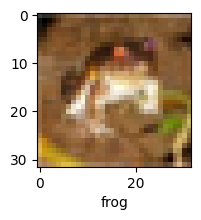

In [61]:
plot_sample(X_train, y_train, 0)

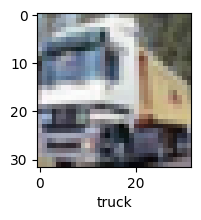

In [62]:
plot_sample(X_train, y_train, 1)

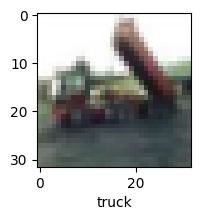

In [63]:
plot_sample(X_train, y_train, 2)

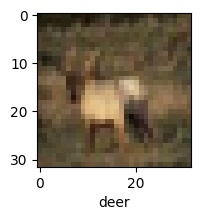

In [64]:
plot_sample(X_train, y_train, 3)

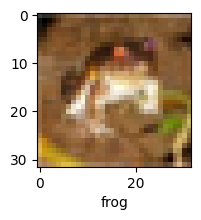

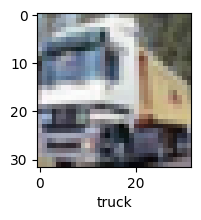

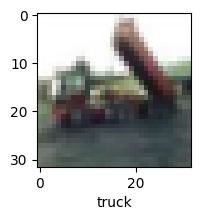

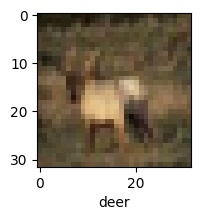

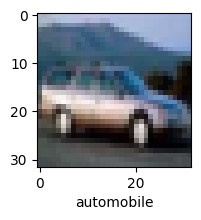

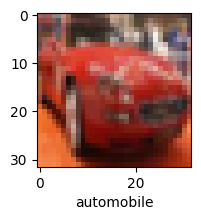

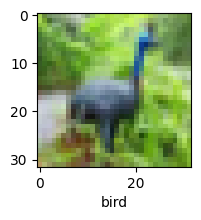

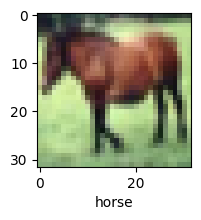

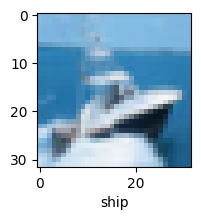

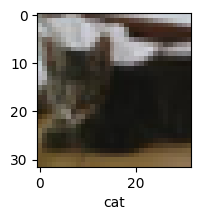

In [65]:
for i in range(10):
  plot_sample(X_train, y_train, i)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255



In [66]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification


In [67]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8144 - accuracy: 0.3547
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6224 - accuracy: 0.4277
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5429 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4813 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4329 - accuracy: 0.4971


You can see that at the end of 5 epochs, accuracy is at around 49%



In [68]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_class))


313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.52      0.55      1000
           1       0.70      0.41      0.52      1000
           2       0.36      0.37      0.37      1000
           3       0.32      0.45      0.37      1000
           4       0.48      0.36      0.41      1000
           5       0.43      0.31      0.36      1000
           6       0.45      0.66      0.54      1000
           7       0.72      0.39      0.50      1000
           8       0.57      0.67      0.61      1000
           9       0.47      0.68      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



Now let us build a convolutional neural network to train our images


In [69]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [70]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5245 - accuracy: 0.4485
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1599 - accuracy: 0.5925
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0346 - accuracy: 0.6382
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9614 - accuracy: 0.6647
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8961 - accuracy: 0.6887
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8507 - accuracy: 0.7033
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8081 - accuracy: 0.7183
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7695 - accuracy: 0.7307
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7330 - accuracy: 0.7449
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.706

In [72]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2304)              0         
                                                                 
 dense_13 (Dense)            (None, 64)               

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features



In [73]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9324 - accuracy: 0.6935


[0.9324216842651367, 0.6934999823570251]

In [74]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[2.58505363e-02, 1.26657658e-03, 2.88169109e-03, 6.73975110e-01,
        2.71899975e-04, 1.66450545e-01, 2.59164106e-02, 2.71714933e-04,
        1.02056682e-01, 1.05884881e-03],
       [4.10716459e-02, 1.67906970e-01, 4.06595937e-04, 3.32569289e-05,
        4.60020929e-05, 3.04121204e-06, 1.23863322e-06, 7.44863019e-06,
        7.86978781e-01, 3.54511477e-03],
       [1.10502966e-01, 2.79044569e-01, 6.35487633e-03, 2.05225050e-02,
        8.71465728e-03, 5.12175960e-04, 3.13198124e-03, 2.18039099e-03,
        5.56781769e-01, 1.22541152e-02],
       [8.65600586e-01, 3.53428200e-02, 3.39147518e-03, 1.44469761e-03,
        1.30719785e-03, 4.77929716e-05, 1.62493845e-04, 6.26209774e-04,
        8.98215622e-02, 2.25512497e-03],
       [9.78720618e-06, 6.19564438e-04, 4.26534330e-03, 8.56775790e-03,
        1.76320940e-01, 1.38167338e-03, 8.08684647e-01, 3.09075767e-05,
        1.09303110e-04, 1.00767602e-05]], dtype=float32)

In [75]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [76]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)